In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
from os import path
import pandas as pd
from torchvision.transforms.functional import to_pil_image

In [3]:
pd.read_csv('../data/labels/sandbox.csv')

,Unnamed: 0,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,0,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
1,1,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0


In [4]:
os.chdir('..')

In [64]:
from model.data import MelanomaDataset

In [68]:
imgs_dir = path.normpath(path.join(os.getcwd(),'data/jpeg/train'))
csv_path = path.normpath(path.join(os.getcwd(),'data/labels/sandbox.csv'))
mds = MelanomaDataset(imgs_dir=imgs_dir, label_csv = csv_path, train = True)

In [69]:
pic, label = mds[1]

----------------------
label:  [0]


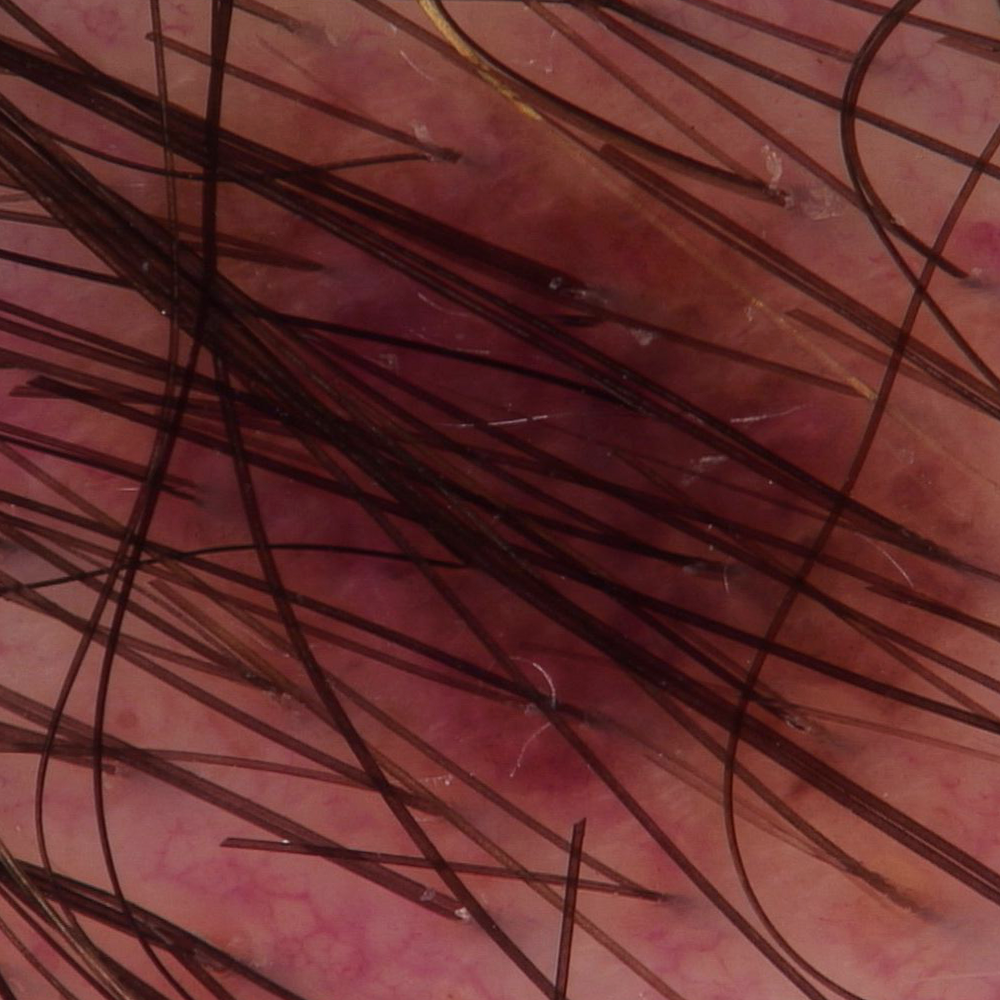

In [70]:
mds.display_sample(1)

In [52]:
mds[0]

0


(tensor([[[0.8039, 0.8000, 0.8000,  ..., 0.8588, 0.8510, 0.8471],
          [0.8039, 0.8039, 0.8039,  ..., 0.8627, 0.8510, 0.8471],
          [0.8078, 0.8118, 0.8118,  ..., 0.8627, 0.8471, 0.8392],
          ...,
          [0.7569, 0.7490, 0.7412,  ..., 0.8000, 0.8000, 0.8157],
          [0.7686, 0.7569, 0.7490,  ..., 0.8078, 0.8039, 0.8196],
          [0.7647, 0.7529, 0.7490,  ..., 0.8235, 0.8235, 0.8235]],
 
         [[0.5255, 0.5137, 0.5176,  ..., 0.5765, 0.5686, 0.5647],
          [0.5294, 0.5216, 0.5216,  ..., 0.5843, 0.5686, 0.5647],
          [0.5294, 0.5255, 0.5294,  ..., 0.5843, 0.5647, 0.5608],
          ...,
          [0.4980, 0.4902, 0.4824,  ..., 0.5647, 0.5608, 0.5804],
          [0.5098, 0.4980, 0.4902,  ..., 0.5725, 0.5686, 0.5804],
          [0.5059, 0.4941, 0.4902,  ..., 0.5922, 0.5922, 0.5843]],
 
         [[0.6157, 0.6118, 0.6118,  ..., 0.6824, 0.6745, 0.6706],
          [0.6196, 0.6157, 0.6157,  ..., 0.6863, 0.6745, 0.6706],
          [0.6196, 0.6235, 0.6275,  ...,